# 1. Visualizando os Dados

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df=pd.read_csv("C:/Users/anton/Downloads/archive (15)/Ecommerce_DBS.csv")
df.head(10)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source,Country,State,Latitude,Longituide
0,46251,08/09/2020,Electronics,12,3,740,7,20,Male,Instagram Campign,Canada,Alberta,55.000000,-115.000000
1,46251,05/03/2022,Home,468,4,2739,8,20,Male,Instagram Campign,Canada,Ontario,50.000000,-85.000000
2,46251,23/05/2022,Home,288,2,3196,10,20,Male,SEM,United States,New Mexico,34.840515,-106.248482
3,46251,12/11/2020,Clothing,196,1,3509,3,20,Male,Instagram Campign,Canada,Saskatchewan,55.000000,-106.000000
4,13593,27/11/2020,Home,449,1,3452,3,20,Female,Instagram Campign,United States,California,36.116203,-119.681564
5,13593,07/03/2023,Home,250,4,575,3,20,Female,Instagram Campign,United States,California,36.116203,-119.681564
6,13593,15/04/2023,Electronics,73,1,1896,8,20,Female,Instagram Campign,United States,California,36.116203,-119.681564
7,13593,27/03/2021,Books,337,2,2937,9,20,Female,SEM,United States,California,36.116203,-119.681564
8,13593,05/05/2020,Clothing,182,2,3363,4,20,Female,Instagram Campign,United States,California,36.116203,-119.681564
9,28805,13/09/2023,Electronics,394,2,1993,4,20,Male,SEM,United States,California,36.116203,-119.681564


In [30]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   NPS                    250000 non-null  int64  
 7   Customer Age           250000 non-null  int64  
 8   Gender                 250000 non-null  object 
 9   Source                 250000 non-null  object 
 10  Country                250000 non-null  object 
 11  State                  250000 non-null  object 
 12  Latitude               250000 non-null  float64
 13  Longituide             250000 non-null  float64
dtypes: float64(2), int64(6), object(6)
m

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'NPS', 'Customer Age ', 'Gender',
       'Source', 'Country', 'State', 'Latitude', 'Longituide'],
      dtype='object')

## Verificando valores faltantes

In [31]:
faltantes_percentual = (df.isnull().sum() / len(df['Customer ID'])) * 100
faltantes_percentual

Customer ID              0.0
Purchase Date            0.0
Product Category         0.0
Product Price            0.0
Quantity                 0.0
Total Purchase Amount    0.0
NPS                      0.0
Customer Age             0.0
Gender                   0.0
Source                   0.0
Country                  0.0
State                    0.0
Latitude                 0.0
Longituide               0.0
dtype: float64

In [32]:
## Deletando valores sem significado na coluna Source

In [33]:
df = df[df['Source'] != 'SEM']

## Distribuição de Idades dos Clientes

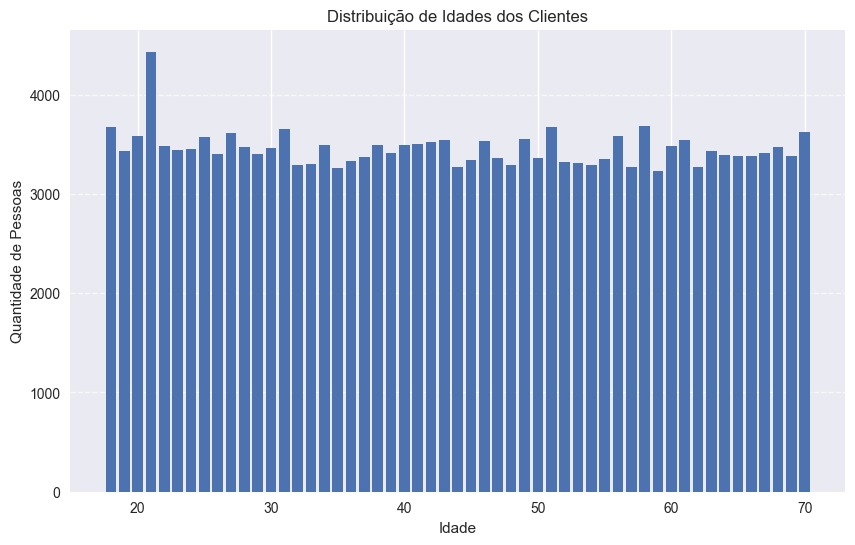

In [34]:
age_counts = df['Customer Age '].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Idade')
plt.ylabel('Quantidade de Pessoas')
plt.title('Distribuição de Idades dos Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Entendendo como as outras variáveis (gênero,idade e source) se comportam em relação a cada tipo de produto

In [35]:

def relacionar_variavel_produto(tipo_produto,variavel_relacionar,df):
    df = df[df['Product Category'] == tipo_produto]
    produto_por_variavel = df[variavel_relacionar].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    plt.bar(produto_por_variavel.index, produto_por_variavel.values)
    plt.xlabel(variavel_relacionar)
    plt.ylabel('Quantidade de Pessoas')
    plt.title(f'Distribuição de {variavel_relacionar} por {tipo_produto}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### Relacionando idade por produto

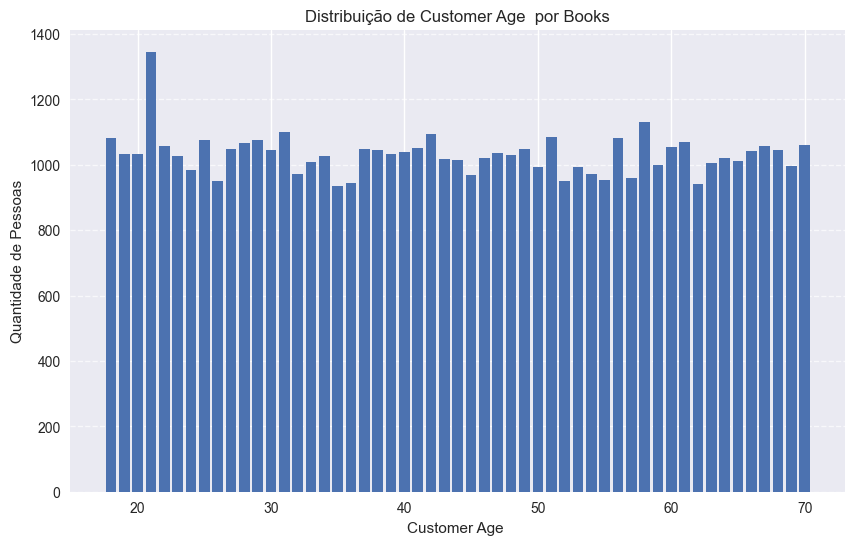

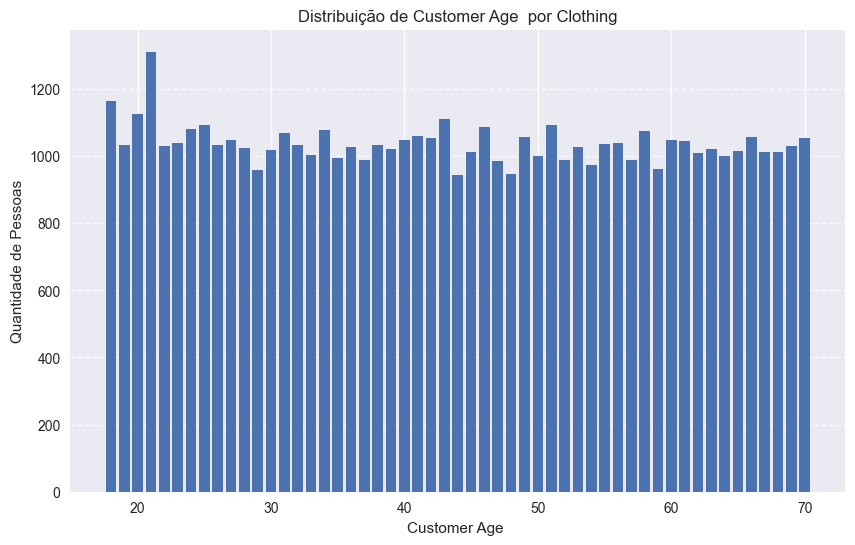

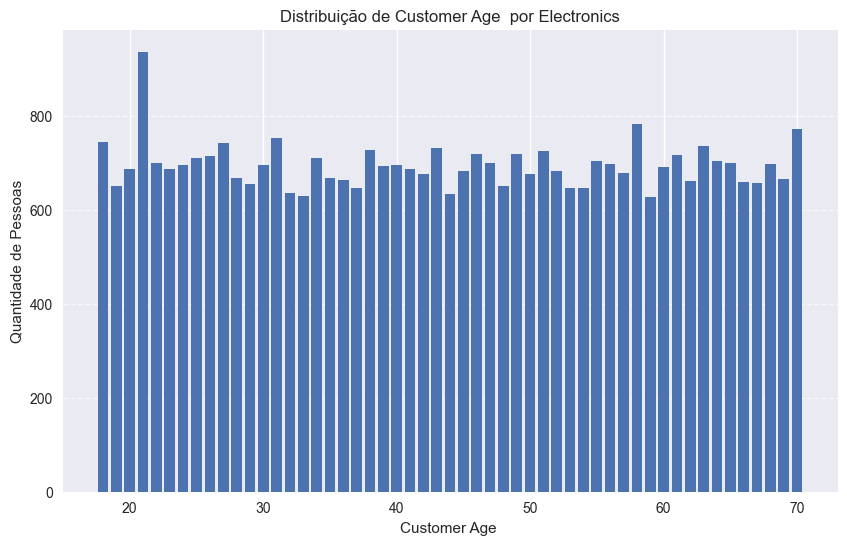

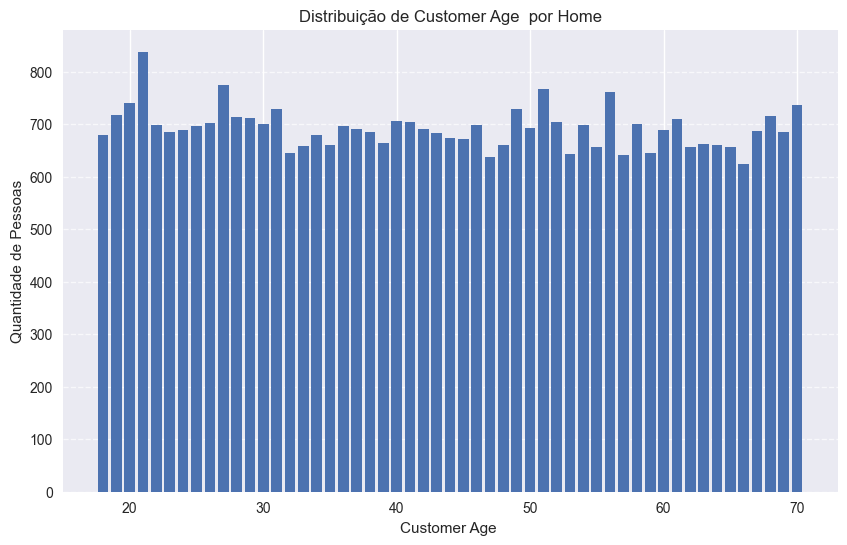

In [36]:
relacionar_variavel_produto('Books','Customer Age ',df)
relacionar_variavel_produto('Clothing','Customer Age ',df)
relacionar_variavel_produto('Electronics','Customer Age ',df)
relacionar_variavel_produto('Home','Customer Age ',df)

## Relacionando gênero por produto
### Os dois gêneros estão em equidade em relação às categorias de produtos comprados.

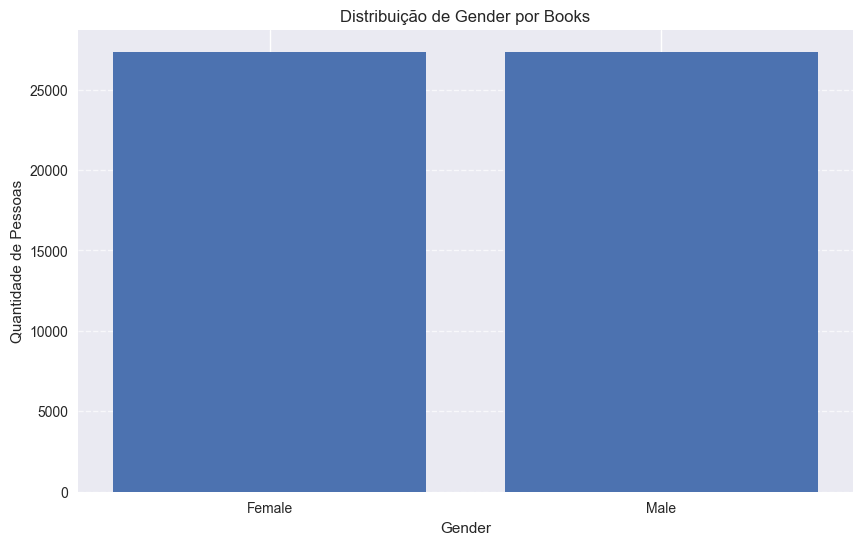

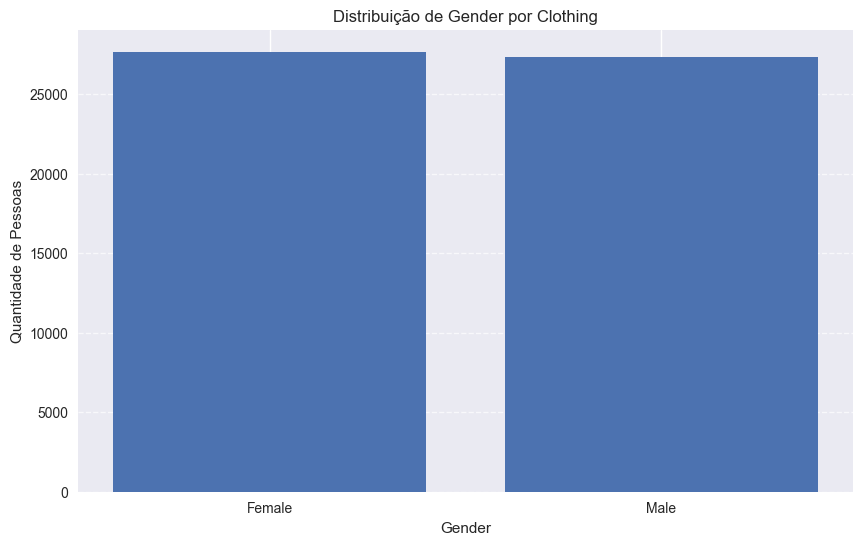

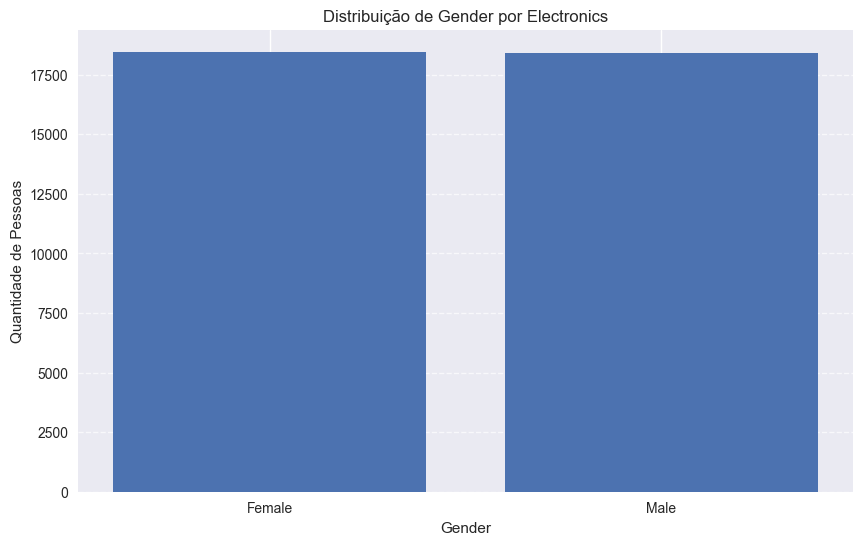

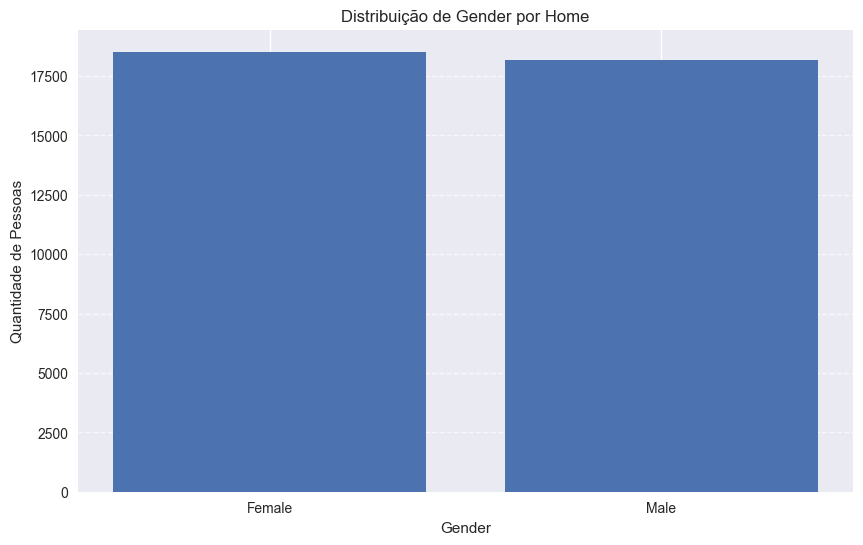

In [37]:
relacionar_variavel_produto('Books','Gender',df)
relacionar_variavel_produto('Clothing','Gender',df)
relacionar_variavel_produto('Electronics','Gender',df)
relacionar_variavel_produto('Home','Gender',df)

## Relacionando status por produto

### Descobri que os melhores canais para vender todos os tipos de produto é pelo Instagram em primeiro lugar e Facebook em segundo

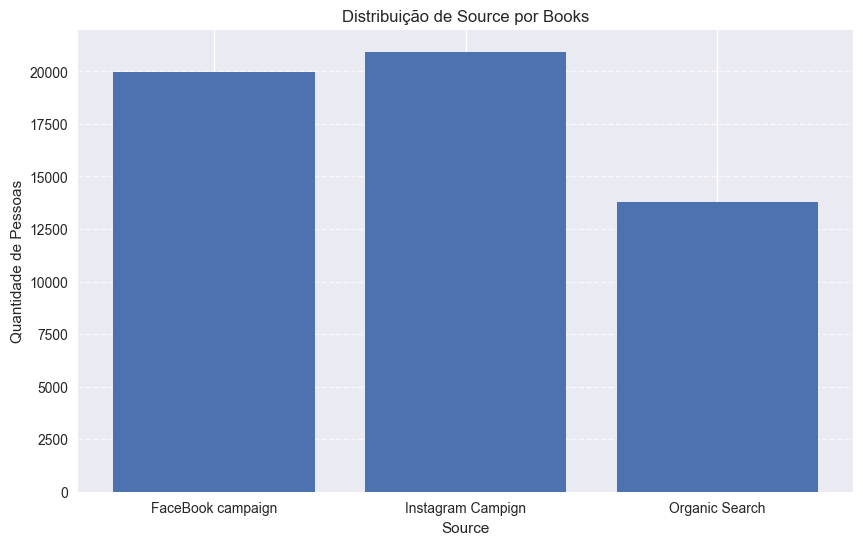

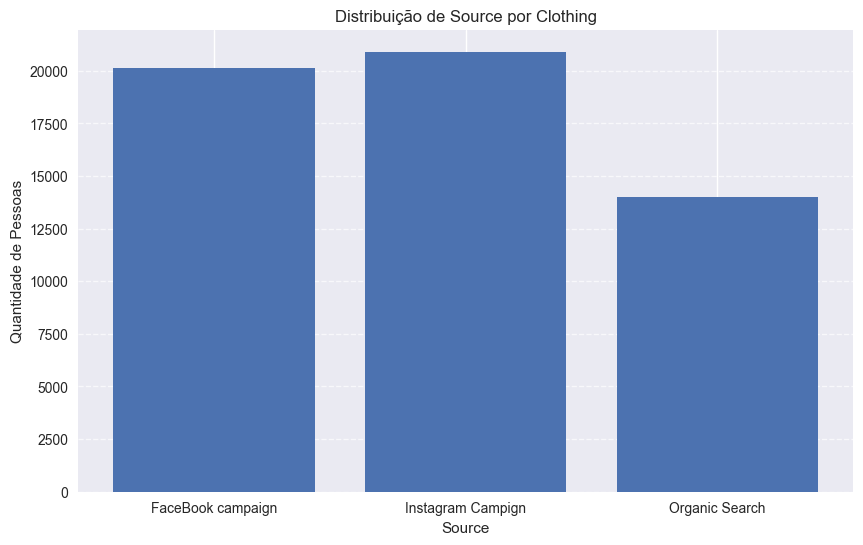

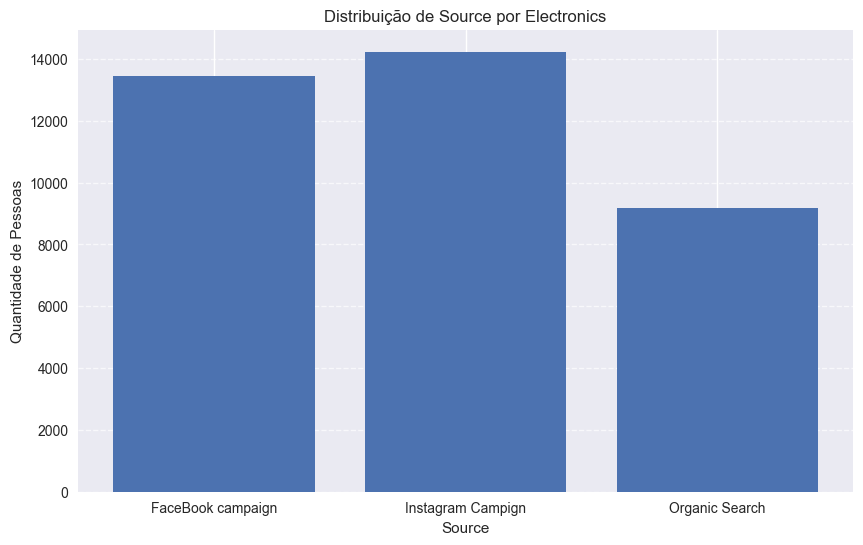

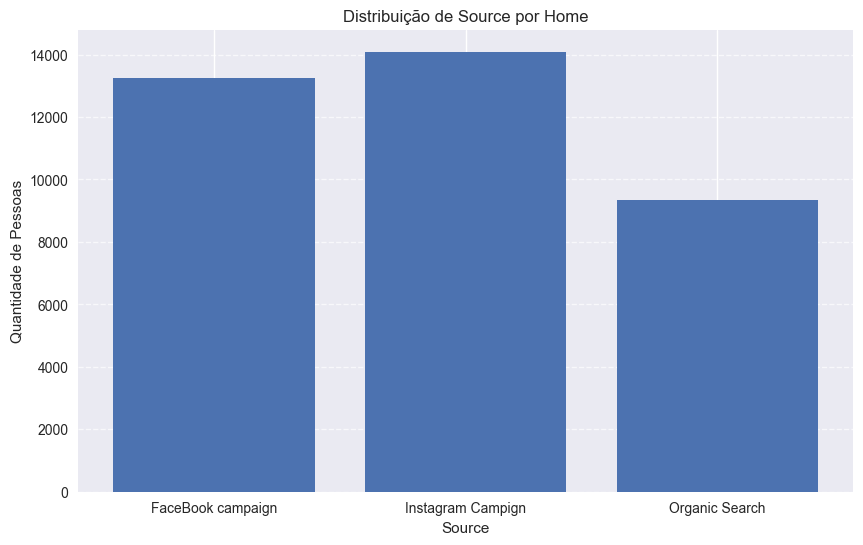

In [38]:
relacionar_variavel_produto('Books','Source',df)
relacionar_variavel_produto('Clothing','Source',df)
relacionar_variavel_produto('Electronics','Source',df)
relacionar_variavel_produto('Home','Source',df)

### Entendendo como as outras variáveis (gênero,idade e produto) se comportam em relação a cada tipo de source


In [39]:
def relacionar_variavel_source(tipo_source,variavel_relacionar,df):
    df = df[df['Source'] == tipo_source]
    source_por_variavel = df[variavel_relacionar].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    plt.bar(source_por_variavel.index, source_por_variavel.values)
    plt.xlabel(variavel_relacionar)
    plt.ylabel('Quantidade de Pessoas')
    plt.title(f'Distribuição de {variavel_relacionar} por {tipo_source}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### Todas as faixa etárias estão igualitariamente divididas por canal

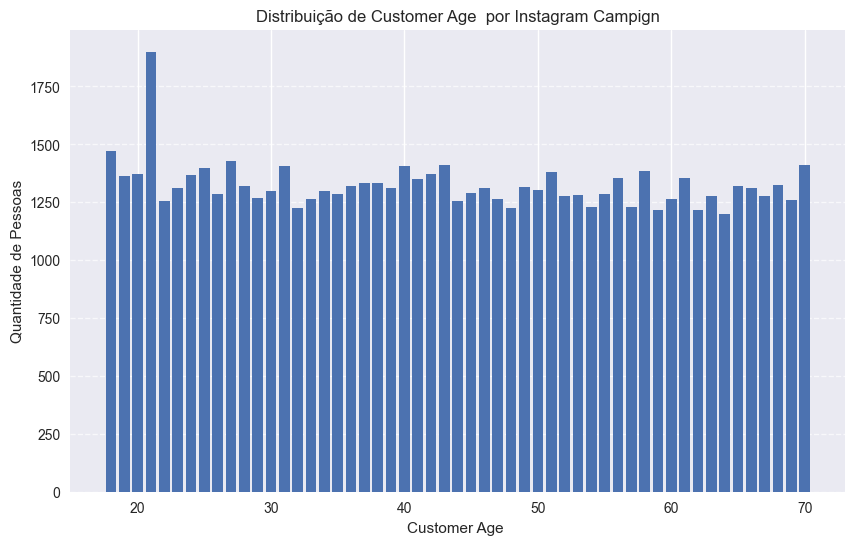

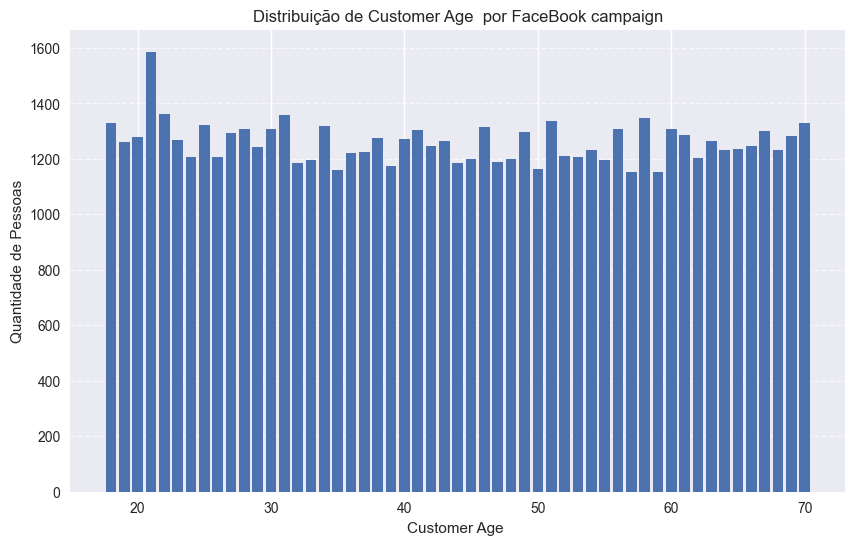

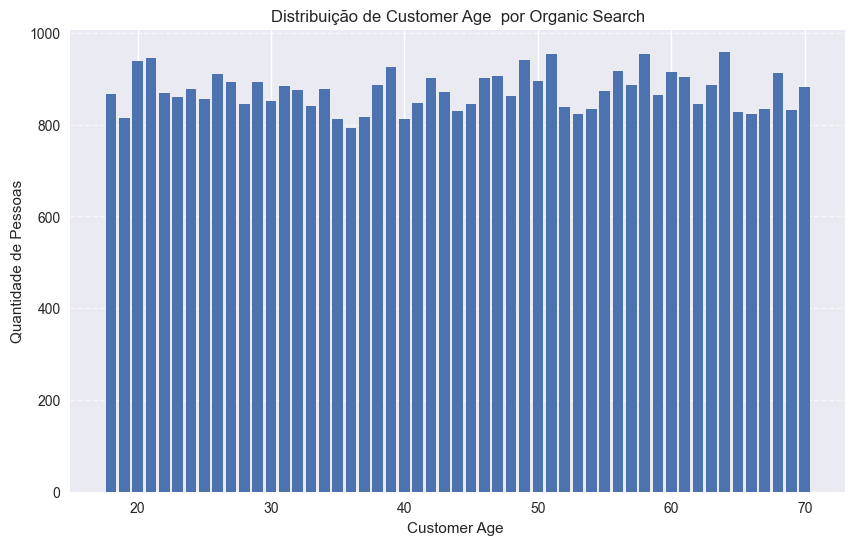

In [40]:
relacionar_variavel_source('Instagram Campign','Customer Age ',df)
relacionar_variavel_source('FaceBook campaign','Customer Age ',df)
relacionar_variavel_source('Organic Search','Customer Age ',df)

### Todos os gêneros estão igualitariamente divididos por canal

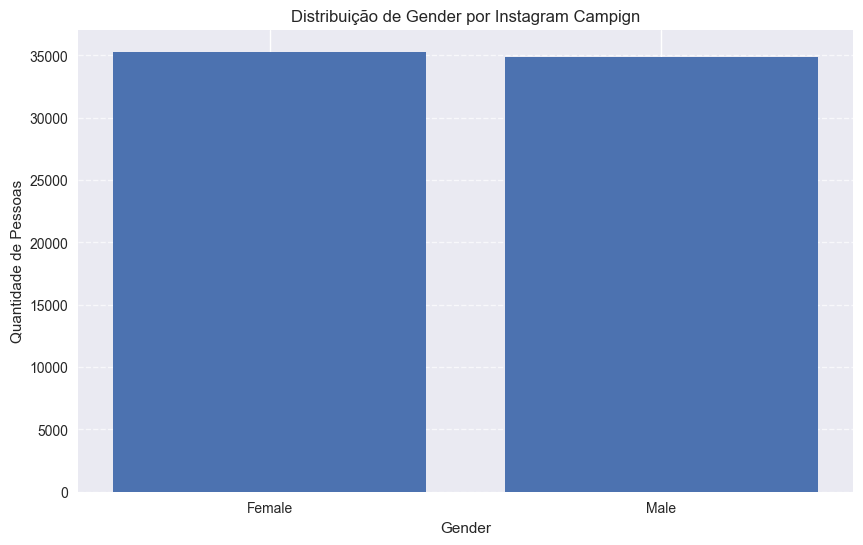

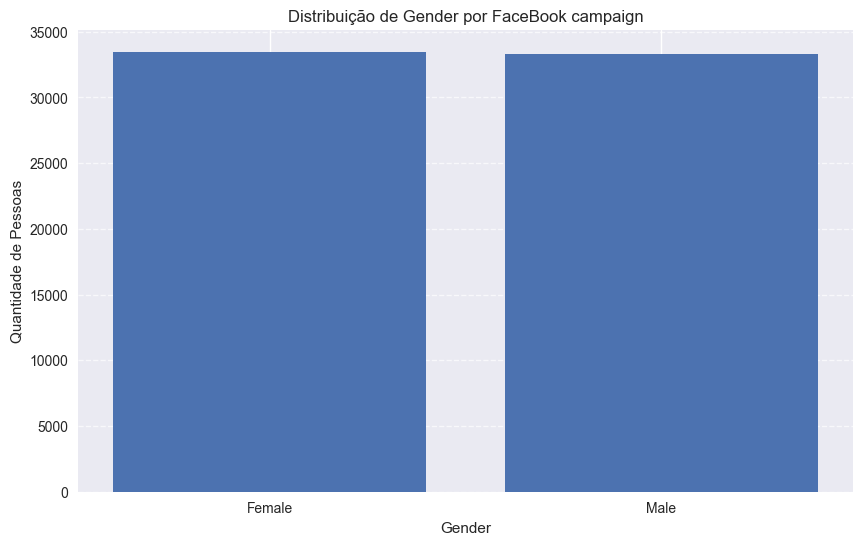

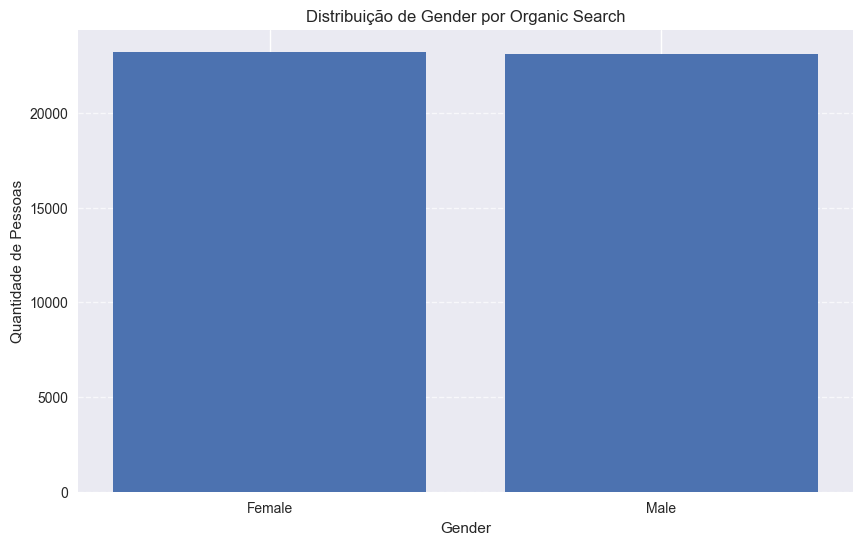

In [41]:
relacionar_variavel_source('Instagram Campign','Gender',df)
relacionar_variavel_source('FaceBook campaign','Gender',df)
relacionar_variavel_source('Organic Search','Gender',df)

### Livros e roupas são os mais vendidos por cada categoria (instagram, facebook e pesquisa orgânica). 
### Mulheres e homens compram igualmente esses produtos

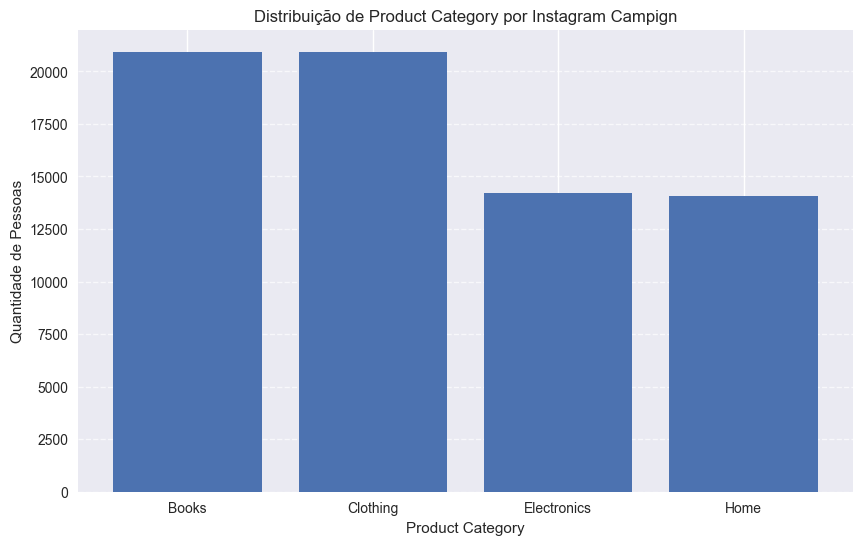

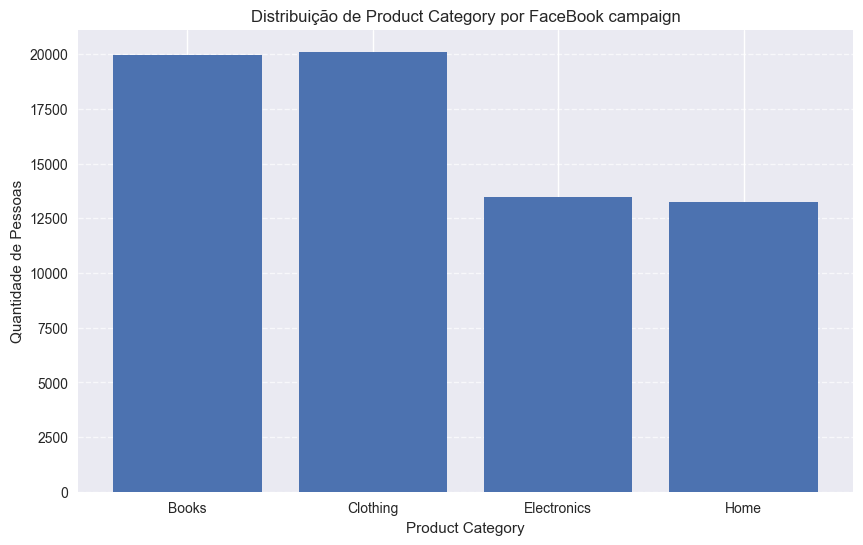

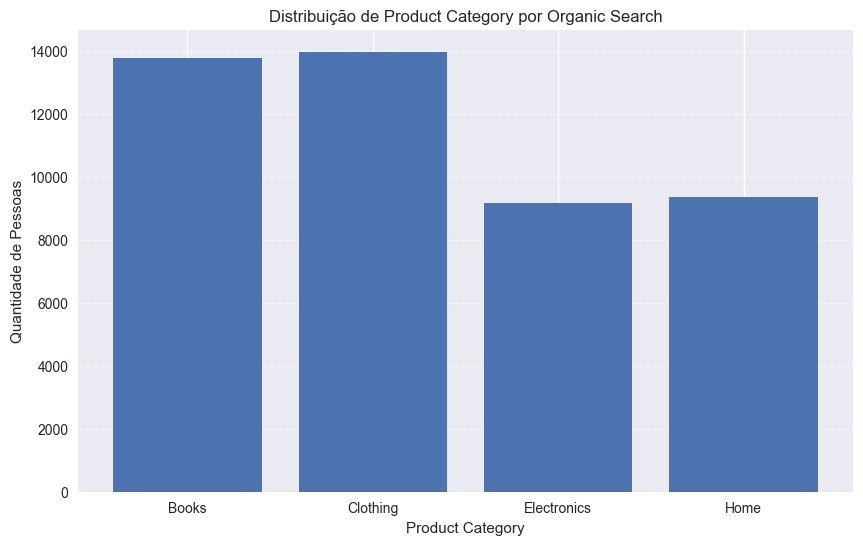

In [42]:
relacionar_variavel_source('Instagram Campign','Product Category',df)
relacionar_variavel_source('FaceBook campaign','Product Category',df)
relacionar_variavel_source('Organic Search','Product Category',df)

### Entendendo a distribuição dos dados de forma mais ampla (os dados estão muito homogêneos, possivelmente os modelos de Machine Learning terão dificuldade de aprender)

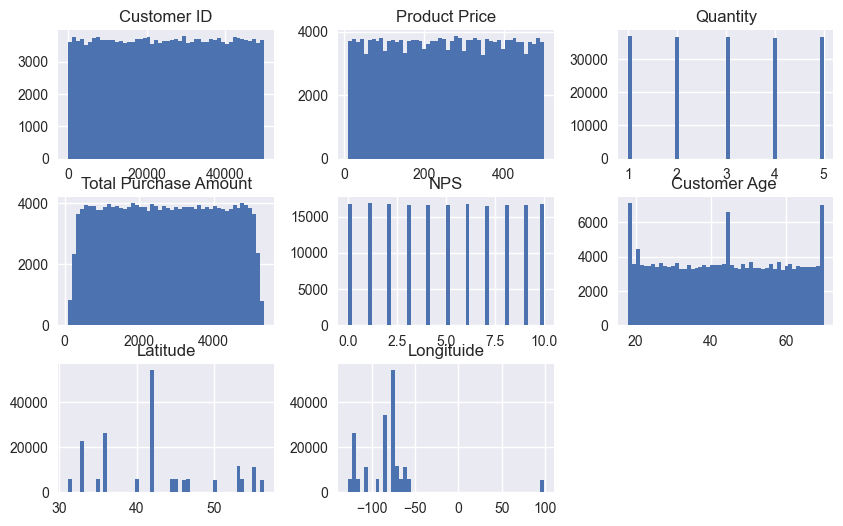

In [43]:
plt.style.use("seaborn-v0_8")
df.hist(bins=50,figsize=(10,6))
plt.show()

# CONCLUSÃO
## "Analisando a base de dados, qual o tipo de público (considerando gênero e idade) e o canal ideal para vender determinado tipo de produto?"
### De acordo com as análises feitas, o tipo de público alvo dessa empresa são todas as faixas etárias de 18 a 70 anos. Os gêneros estão dividos de forma equilibrada por canal, produto e idade. Além disso, o canal ideal para vender determinado tipo de produto é o Instagram. Com isso, concluo que seria interessante a empresa continuar investindo em propagandas no instagram dos produtos mais vendidos (livros e roupas) para todas as faixas etárias e gêneros.

# 2. Respondendo às demais perguntas

In [47]:
df=pd.read_csv("C:/Users/anton/Downloads/archive (15)/Ecommerce_DBS.csv")

### Verificando quantos anos existem no dataset

In [48]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'],dayfirst=True)
df['Purchase Date']=df['Purchase Date'].dt.year
print(df['Purchase Date'].value_counts())

2020    68045
2022    67169
2021    67099
2023    47687
Name: Purchase Date, dtype: int64


### Intervalo das faixas etárias

In [49]:
print(df['Customer Age '].min())
print(df['Customer Age '].max())

18
70


# Pergunta 1
## "Quais os produtos mais vendidos considerando os últimos 3 anos?"
### Baseando-se nos gráficos gerados e na saída dessa função, concluímos que as categorias de produtos mais vendidas foram livros e roupas

In [50]:
print(df.groupby('Product Category')['Quantity'].sum()) #Roupas: 225322 e Livros: 223876

Product Category
Books          223876
Clothing       225322
Electronics    150828
Home           149698
Name: Quantity, dtype: int64


# Pergunta 2
## "Qual o produto mais caro e o mais barato?"
### A pergunta pede os produtos, porém temos apenas a coluna de categorias de produtos e não temos uma coluna de nomes de produtos em si, por isso calculei o valor máximo e mínimo dos produtos

In [51]:
print('Valor Máximo: ',df['Product Price'].max())
print('Valor Mínimo: ',df['Product Price'].min())

Valor Máximo:  500
Valor Mínimo:  10


# Pergunta 3
## "Qual a categoria de produto mais vendida e menos vendida? Qual a categoria mais e menos cara?"
### A categoria de produto mais vendida foram Roupas e a menos vendida foram produtos para casa (Home). A categoria mais cara foram eletrônicos e a mais barata também

In [52]:
print(df.groupby('Product Category')['Quantity'].sum()) #Roupas: 225322 (mais vendido) e Home: 149698 (menos vendido)
linha_maxima = df.loc[df['Product Price'].idxmax()]
print('Categoria Mais Cara: ',linha_maxima['Product Category']) # Eletronics
linha_minimo=df.loc[df['Product Price'].idxmin()]
print('Categoria Mais Barata: ',linha_minimo['Product Category'])# Eletronics

Product Category
Books          223876
Clothing       225322
Electronics    150828
Home           149698
Name: Quantity, dtype: int64
Categoria Mais Cara:  Electronics
Categoria Mais Barata:  Electronics


# Pergunta 4 
## "Qual o produto com melhor e pior NPS?"
### A categoria com maior NPS foram os Livros e a com menor foram as Roupas

In [53]:
linha_nps_maximo = df.loc[df['NPS'].idxmax()] 
print('Categoria Maior NPS: ',linha_nps_maximo['Product Category']) 
linha_nps_minimo=df.loc[df['NPS'].idxmin()]
print('Categoria Menor NPS: ',linha_nps_minimo['Product Category'])


Categoria Maior NPS:  Home
Categoria Menor NPS:  Clothing


# 3. Modelos de Inferência Estatística

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("C:/Users/anton/Downloads/archive (15)/Ecommerce_DBS.csv")

In [68]:
print(df.columns)
df.drop(['Customer ID', 'Purchase Date','State','Product Price', 'Total Purchase Amount', 'NPS','Latitude', 'Longituide','Country'],axis=1,inplace=True)
df = df[df['Source'] != 'SEM']
print(df.info())

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'NPS', 'Customer Age ', 'Gender',
       'Source', 'Country', 'State', 'Latitude', 'Longituide'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 183257 entries, 0 to 249999
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product Category  183257 non-null  object
 1   Quantity          183257 non-null  int64 
 2   Customer Age      183257 non-null  int64 
 3   Gender            183257 non-null  object
 4   Source            183257 non-null  object
dtypes: int64(2), object(3)
memory usage: 8.4+ MB
None


## One hot encoding

In [69]:
df['Source'] = pd.Categorical(df['Source']).codes

product_encode = pd.get_dummies(df['Product Category'])
df = pd.concat([df, product_encode], axis = 1)
df.drop('Product Category', axis = 1, inplace = True)

gender_encode = pd.get_dummies(df['Gender'])
df = pd.concat([df, gender_encode], axis = 1)
df.drop('Gender', axis = 1, inplace = True)

print(df.info())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183257 entries, 0 to 249999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Quantity       183257 non-null  int64
 1   Customer Age   183257 non-null  int64
 2   Source         183257 non-null  int8 
 3   Books          183257 non-null  uint8
 4   Clothing       183257 non-null  uint8
 5   Electronics    183257 non-null  uint8
 6   Home           183257 non-null  uint8
 7   Female         183257 non-null  uint8
 8   Male           183257 non-null  uint8
dtypes: int64(2), int8(1), uint8(6)
memory usage: 5.4 MB
None
Index(['Quantity', 'Customer Age ', 'Source', 'Books', 'Clothing',
       'Electronics', 'Home', 'Female', 'Male'],
      dtype='object')


### Otimizando a memória do dataframe de 5.4 MB para 4.0 MB 

In [70]:
df[['Customer Age ','Quantity']] = df[['Customer Age ','Quantity']].astype(int)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 183257 entries, 0 to 249999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Quantity       183257 non-null  int32
 1   Customer Age   183257 non-null  int32
 2   Source         183257 non-null  int8 
 3   Books          183257 non-null  uint8
 4   Clothing       183257 non-null  uint8
 5   Electronics    183257 non-null  uint8
 6   Home           183257 non-null  uint8
 7   Female         183257 non-null  uint8
 8   Male           183257 non-null  uint8
dtypes: int32(2), int8(1), uint8(6)
memory usage: 4.0 MB
None


## Correlação entre os dados

### As variáveis estão pouquíssimo relacionados, isso dificultará o modelo de fazer previsões como mencionado anteriormente

<Axes: >

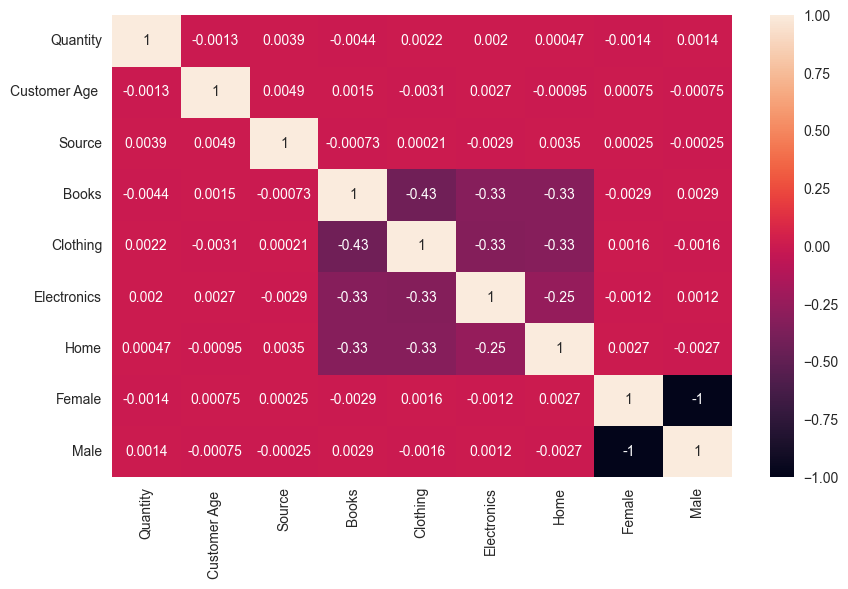

In [71]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [72]:
y = df['Source']
X = df.drop('Source',axis=1)
print(y.shape,X.shape)

(183257,) (183257, 8)


### Separando o conjunto de dados

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=34)

### Criação do modelo KNN:

Text(0, 0.5, 'Previsões')

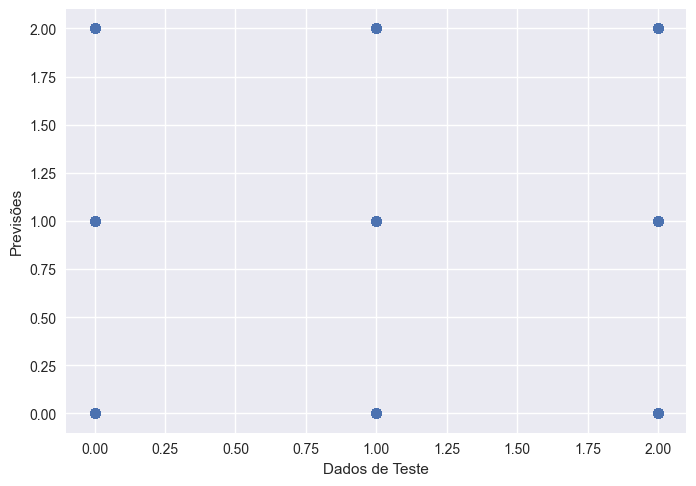

In [74]:
from sklearn.preprocessing import MinMaxScaler
normalizador = MinMaxScaler(feature_range=(0, 1))
X = normalizador.fit_transform(X)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel('Dados de Teste')
plt.ylabel('Previsões')

### Score KNN

In [76]:
resultado = knn.score(X_test, y_test)
print("Acurácia:", resultado) # 0.37

Acurácia: 0.36178107606679033


### Usando conceito de bagging para tentar melhorar o resultado modelo

In [75]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
modelo = BaggingClassifier(estimator=KNeighborsClassifier(),n_estimators=50,max_samples=0.5 ,bootstrap=True,n_jobs=-1) 
skfold = StratifiedKFold(n_splits=3)
resultado = cross_val_score(modelo,X,y,cv=skfold,n_jobs=-1)
print(resultado.mean()) #0.37 

0.3682205790863881


### Criação do modelo de árvores de decisão

In [78]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
from sklearn.tree import DecisionTreeClassifier
trees = DecisionTreeClassifier()
trees.fit(X_train_scaled, y_train)
resultado = trees.score(X_test_scaled, y_test)
print("Acurácia:", resultado) # 0.38

Acurácia: 0.37012987012987014


### Usando conceito de bagging para tentar melhorar o resultado modelo

In [79]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
modelo = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=50,max_samples=0.5 ,bootstrap=True,n_jobs=-1) 
skfold = StratifiedKFold(n_splits=3)
resultado = cross_val_score(modelo,X,y,cv=skfold,n_jobs=-1)
print(resultado.mean())

0.369852170489186


### Testando modelo GaussianNB

In [80]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
modelo = BaggingClassifier(estimator=GaussianNB(),n_estimators=50,max_samples=0.5 ,bootstrap=True,n_jobs=-1)
skfold = StratifiedKFold(n_splits=3)
resultado = cross_val_score(modelo,X,y,cv=skfold,n_jobs=-1)
print(resultado.mean()) # 0.38

0.38219549885398835


### Testando modelo de Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
modelo = RandomForestClassifier(n_estimators=50,n_jobs=-1) # quantas árvores de decisão serão construídas
skfold = StratifiedKFold(n_splits=5)
resultado = cross_val_score(modelo,X,y,cv=skfold,n_jobs=-1)
print(resultado.mean()) # 0.37

0.3713418767314943


### Testando modelo de Extra Trees

In [82]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
modelo = ExtraTreesClassifier(n_estimators=50,n_jobs=-1)
skfold = StratifiedKFold(n_splits=3)
resultado = cross_val_score(modelo,X,y,cv=skfold,n_jobs=-1)
print(resultado.mean()) # 0.37

0.37068706945874713


### Testando modelo de Ada Boost

In [83]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score
modelo = AdaBoostClassifier(n_estimators=500,learning_rate=0.1)
skfold = StratifiedKFold(n_splits=3)
resultado = cross_val_score(modelo,X,y,cv=skfold,n_jobs=-1)
print(resultado.mean()) #0.382

0.3826975281461016


### Explorando Redes Neurais com Keras

Epoch 1/10
147/147 [==============================] - 7s 30ms/step - loss: 0.3799 - acc: 0.3829 - val_loss: 0.3748 - val_acc: 0.3829
Epoch 2/10
147/147 [==============================] - 2s 11ms/step - loss: 0.3569 - acc: 0.3829 - val_loss: 0.3700 - val_acc: 0.3829
Epoch 3/10
147/147 [==============================] - 2s 11ms/step - loss: 0.3525 - acc: 0.3829 - val_loss: 0.3685 - val_acc: 0.3829
Epoch 4/10
147/147 [==============================] - 2s 11ms/step - loss: 0.3508 - acc: 0.3829 - val_loss: 0.3668 - val_acc: 0.3829
Epoch 5/10
147/147 [==============================] - 2s 11ms/step - loss: 0.3499 - acc: 0.3829 - val_loss: 0.3661 - val_acc: 0.3829
Epoch 6/10
147/147 [==============================] - 2s 11ms/step - loss: 0.3497 - acc: 0.3829 - val_loss: 0.3696 - val_acc: 0.3829
Epoch 7/10
147/147 [==============================] - 2s 11ms/step - loss: 0.3486 - acc: 0.3829 - val_loss: 0.3651 - val_acc: 0.3829
Epoch 8/10
147/147 [==============================] - 2s 11ms/step - 

Text(0, 0.5, 'Acurácia')

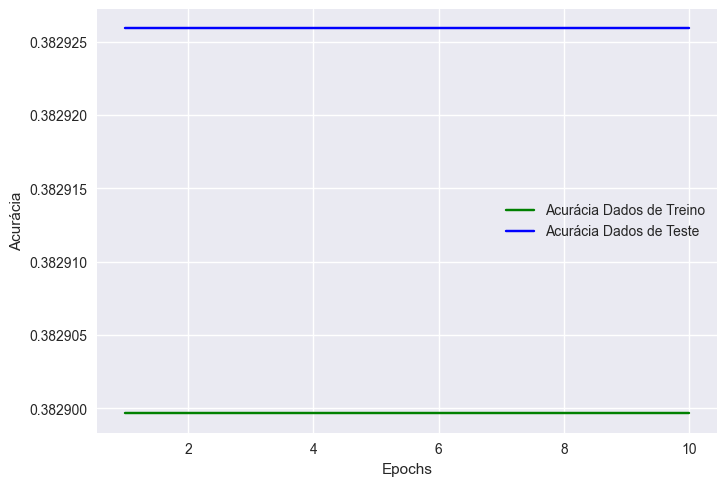

In [94]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam

modelo = Sequential()
modelo.add(Dense(100,input_dim=8,kernel_initializer='normal',activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(50,kernel_initializer='normal',activation='relu'))
modelo.add(Dense(1,kernel_initializer='normal',activation='softmax'))

otimizador = Adam(amsgrad=True)

modelo.compile(loss='binary_crossentropy',optimizer=otimizador,metrics=['acc'])
historico = modelo.fit(X_train,y_train,epochs=10,batch_size=1000,validation_data=(X_test,y_test),verbose=1)

import matplotlib.pyplot as plt
acuracia_treino = historico.history['acc']
acuracia_teste = historico.history['val_acc']

epochs = range(1,len(acuracia_treino)+1)

plt.plot(epochs,acuracia_treino,'-g',label="Acurácia Dados de Treino")
plt.plot(epochs,acuracia_teste,'-b',label="Acurácia Dados de Teste")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel("Acurácia") # 0.383

# Observação
### Eu poderia utilizar otimizadores de hiperparâmetros como GridSearchCV ou RandomizedSearchCV para verificar se ocorria uma melhora da performance dos modelos, porém, as acurácias estão muito baixas, o que sugere que o conjunto de dados está muito homogêneo (como observei nas análises feitas), dificultando a previsão do modelo. 

### Por fim, não encontrei nenhum modelo que se adequasse bem ao conjunto de dados solicitado. Imagino que isso tenha acontecido por ter features muito homogêneas e pouco correlacionadas impossibilitando uma previsão adequada das variáveis target.